# Ultimate Data Challenge

## Part 1 Exploratory Data Analysis

In [1]:
#Import relevant libraries/modules
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [2]:
#Load data  
df = pd.read_json("logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#check data - datetimestamped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.shape

(93142, 1)

In [5]:
#Check end of data
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


Dataset runs from the beginning of 1970 through to the middle of April 1970

In [6]:
#Check null values
df.isnull().sum()

login_time    0
dtype: int64

There are no null values

In [7]:
#Reset index to datetime index
df = df.set_index('login_time')

In [8]:
df.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [9]:
#Check how dataframe looks
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [10]:
#Add a count to log-ins
df['count'] = 1
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [11]:
#Resample the data into 15minute intervals
Fifteen_int = df.resample('15T').sum()

In [12]:
#Check how the data looks
Fifteen_int.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [13]:
#Create some month, weekday name, and week labels to aid analysis
Fifteen_int['Month'] = Fifteen_int.index.month
Fifteen_int['Weekday Name'] = Fifteen_int.index.day_name()
Fifteen_int['Week'] = Fifteen_int.index.week
Fifteen_int.head()

C:\Users\Pearc\AppData\Local\Temp\ipykernel_10840\3250935067.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  Fifteen_int['Week'] = Fifteen_int.index.week


,count,Month,Weekday Name,Week
login_time,,,,
1970-01-01 20:00:00,2,1,Thursday,1
1970-01-01 20:15:00,6,1,Thursday,1
1970-01-01 20:30:00,9,1,Thursday,1
1970-01-01 20:45:00,7,1,Thursday,1
1970-01-01 21:00:00,1,1,Thursday,1


In [14]:
#Check no missing weeks
Fifteen_int['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

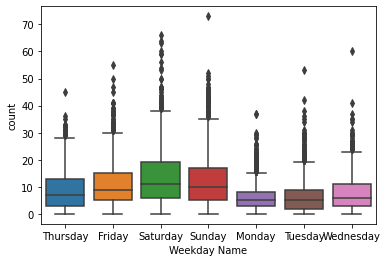

In [15]:
#Plot boxplot to see distribution of data across days
sns.boxplot(data=Fifteen_int, x='Weekday Name', y='count');

Can see how demand starts off low on Monday and builds across the week to Saturday, before reducing again to low Monday levels

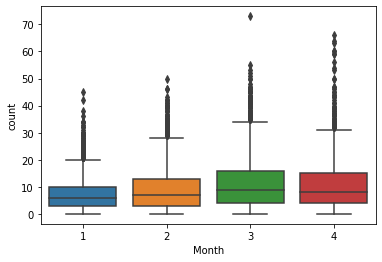

In [16]:
#Boxplots for the months
sns.boxplot(data=Fifteen_int, x='Month', y='count');

Can see how demand increases over the month - note that 4/April is only for half a month.

<AxesSubplot:xlabel='login_time'>

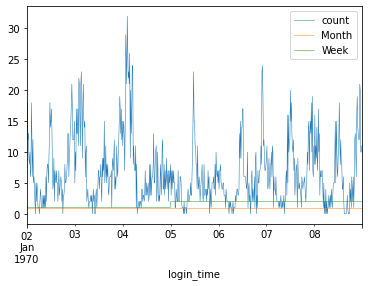

In [17]:
#Look at the first week
Fifteen_int.loc['1970-01-02':'1970-01-08'].plot(linewidth=0.5)

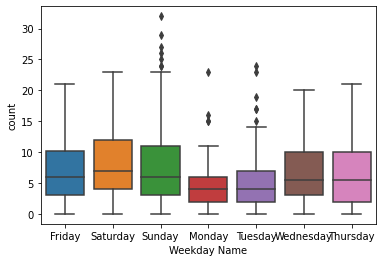

In [18]:
#Adjusted first week to boxplot and started on 2 January, as incomplete data for 1 January
sns.boxplot(data=Fifteen_int.loc['1970-01-02':'1970-01-08'], x='Weekday Name', y='count');

<AxesSubplot:xlabel='login_time'>

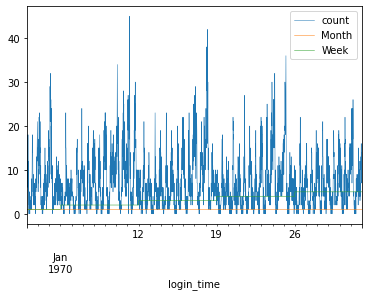

In [19]:
#Snapshot of January 1970
Fifteen_int.loc['1970-01-02':'1970-01-31'].plot(linewidth=0.5)

<AxesSubplot:xlabel='login_time'>

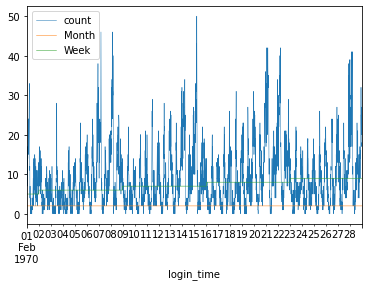

In [20]:
#Febuary
Fifteen_int.loc['1970-02'].plot(linewidth=0.5)

<AxesSubplot:xlabel='login_time'>

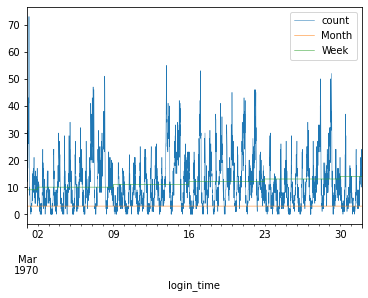

In [21]:
#March
Fifteen_int.loc['1970-03'].plot(linewidth=0.5)

<AxesSubplot:xlabel='login_time'>

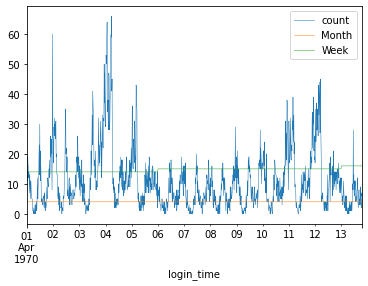

In [22]:
#April
Fifteen_int.loc['1970-04'].plot(linewidth=0.5)

Easy to see the regular weekly/monthly patterns of demand in the graphs

<AxesSubplot:xlabel='login_time'>

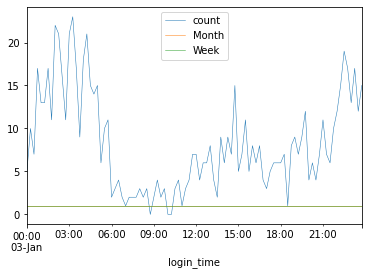

In [23]:
#Saturday 3 Jan 1970
Fifteen_int.loc['1970-01-03'].plot(linewidth=0.5)

<AxesSubplot:xlabel='login_time'>

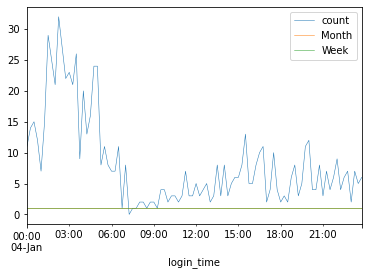

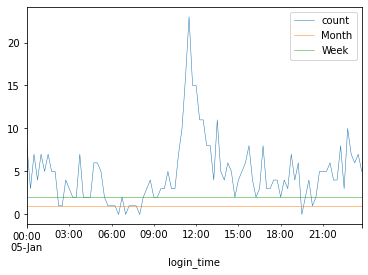

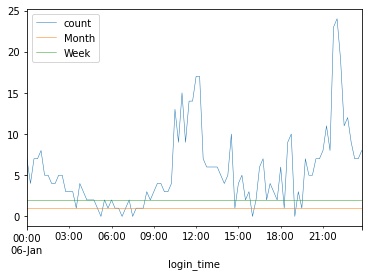

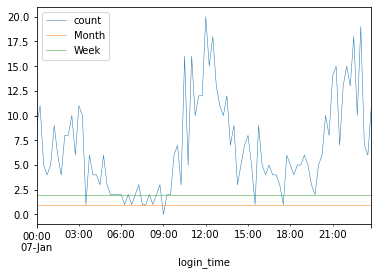

In [24]:
#Look at some sample days
#Sunday 4 Jan 1970, 5th, 6th, 7th
Fifteen_int.loc['1970-01-4'].plot(linewidth=0.5)
Fifteen_int.loc['1970-01-5'].plot(linewidth=0.5)
Fifteen_int.loc['1970-01-6'].plot(linewidth=0.5)
Fifteen_int.loc['1970-01-7'].plot(linewidth=0.5)

Easy to see regular cycle of demand, with peaks in the middle of the day and at the end of the day.

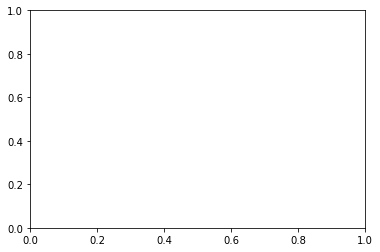

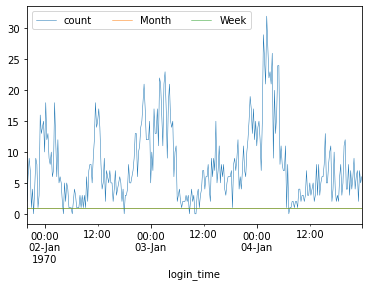

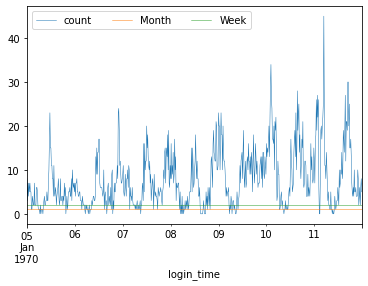

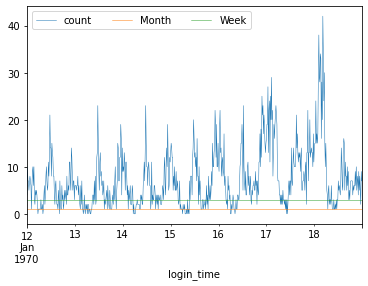

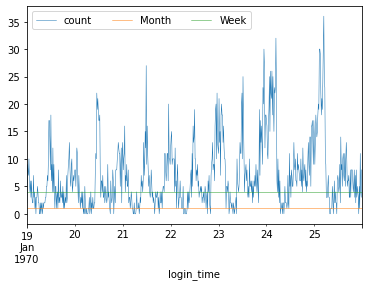

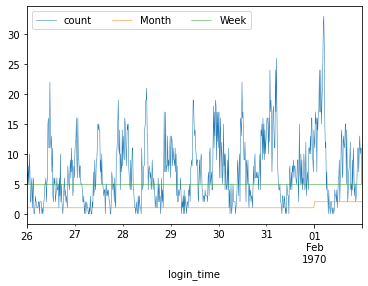

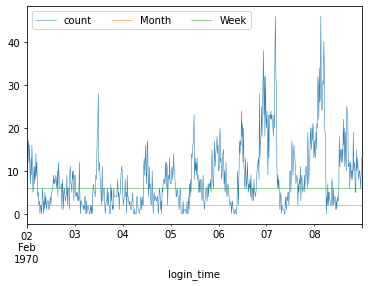

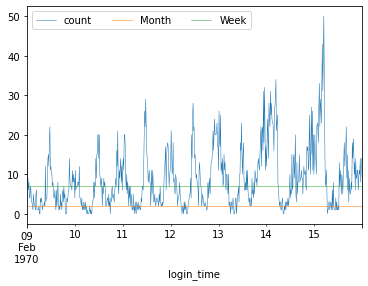

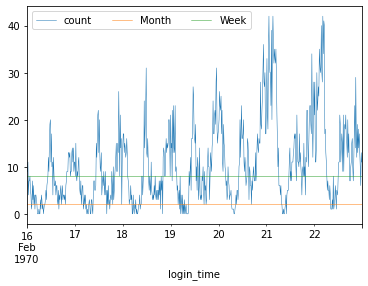

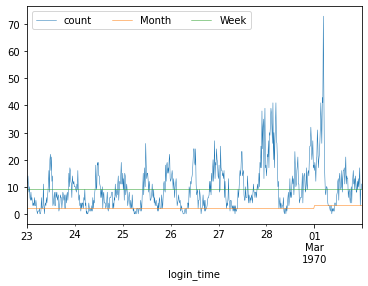

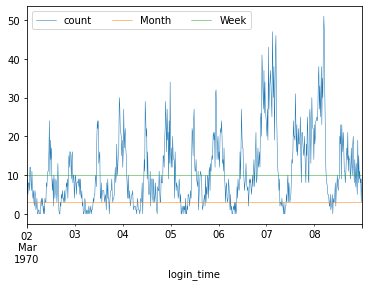

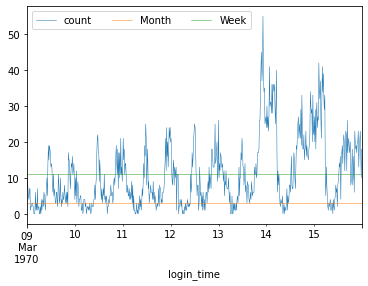

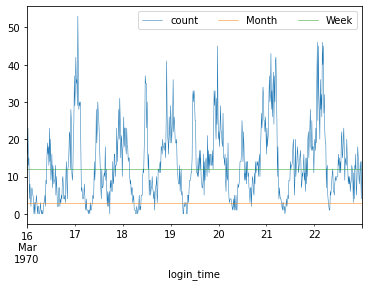

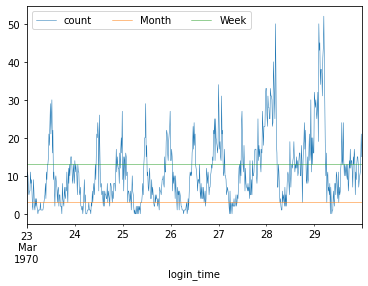

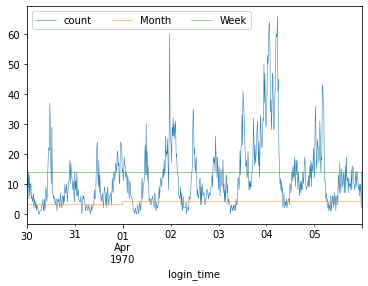

In [25]:
#Inspect data week by week
import matplotlib.colors as mcolors
fig1, ax1 = plt.subplots()

for i in range(1,15):
    Week = Fifteen_int[Fifteen_int['Week']==i].plot(linewidth=0.5)
    Week.plot(color=mcolors, ax=ax1)
    plt.legend(ncol=4, loc='best')

#Fifteen_int[Fifteen_int['Week']==1].plot(linewidth=0.5)
#Fifteen_int[Fifteen_int['Week']==2].plot(linewidth=0.5)
#Fifteen_int[Fifteen_int['Week']==3].plot(linewidth=0.5)

Easy to see consistency of data from week to week, with some exceptions, presumably due to public holidays/events, etc - see further below)

In [26]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

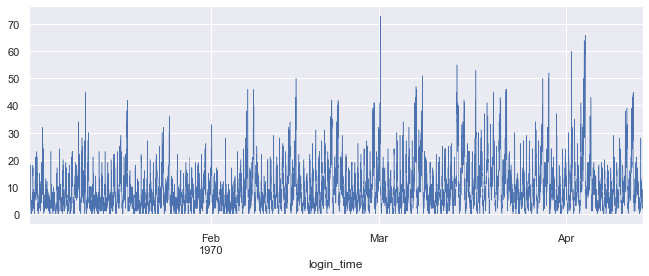

In [27]:
#Create lineplot
Fifteen_int['count'].plot(linewidth=0.5);

In [28]:
#Create rolling mean average for a day (so 4 fifteen minute intervals per hour, multiplied by 24 hours in a day, equals 96)
rolling_mean = Fifteen_int['count'].rolling(96).mean()
rolling_std = Fifteen_int['count'].rolling(96).std()

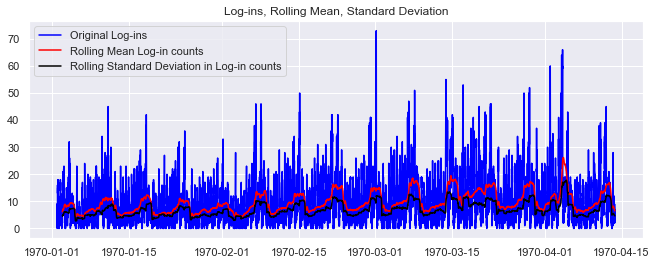

In [29]:
#Plot rolling mean, standard deviation, against the original line plot of logins
plt.plot(Fifteen_int['count'], color="blue", label="Original Log-ins")
plt.plot(rolling_mean, color="red", label="Rolling Mean Log-in counts")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Log-in counts")
plt.title("Log-ins, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

Good, clear visualisation of the data, its regularity and trends, including some of the spikes.

In [30]:
#Augmented DickeyFuller test
adft = adfuller(Fifteen_int['count'],autolag="AIC")

In [31]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']],
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                    "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -1.033795e+01              Test Statistics
1  2.732397e-18                      p-value
2  3.800000e+01             No. of lags used
3  9.749000e+03  Number of observations used
4 -3.431021e+00          critical value (1%)
5 -2.861837e+00          critical value (5%)
6 -2.566928e+00         critical value (10%)


In [32]:
#P value less than 5% so data is stationary and test statistic is greate than the critical value
from decimal import Decimal

s = 2.7e-18

print(Decimal(s))

2.699999999999999885015753845521459684069280885704397894564454674082298879511654376983642578125E-18


In [33]:
#Check autocorrelation on a daily basis
autocorrelation_lagDay = Fifteen_int['count'].autocorr(lag=96)
print("One Day Lag: ", autocorrelation_lagDay)

One Day Lag:  0.49284766069880687


In [34]:
#And weekly
autocorrelation_lagWeek = Fifteen_int['count'].autocorr(lag=672)
print("One Week Lag: ", autocorrelation_lagWeek)

One Week Lag:  0.708296579634061


In [35]:
#And every 28days
autocorrelation_lag4Week = Fifteen_int['count'].autocorr(lag=2688)
print("Four Week Lag: ", autocorrelation_lag4Week)

Four Week Lag:  0.7304110185442444


  Stronger autocorrelation with the data over weekly and four weekly lags, but not so noticeable on a daily basis. Fits with visual observations

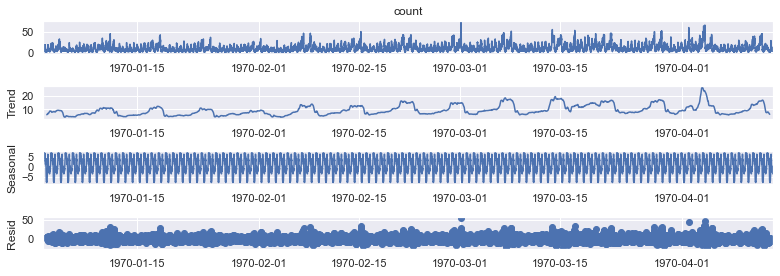

In [36]:
#Decompose the data
decompose = seasonal_decompose(Fifteen_int['count'],model='additive', period=96)
decompose.plot()
plt.show()

### Report/Conclusions
The data are reliable and no null values were found.

#### Key features
-  The data is stationary
-  There is an increasing trend over time, with mean log-ins increasing from January to mid-April 1970.
-  The daily pattern tends to show demand climbing around midday/early afternoon, decreasing in the early evening and then climbing again to a major peak of the day between midnight and 3.00am, before then subsiding again until towards the middle of the following day.
-  On weekly basis, starting from Monday, demand is low, but becomes to steadily climb on a weekly basis, peaking at the end of Saturday and in the small hours of the morning, before subsiding again until the middle of the following week.
-  Certain aberrations can be seen on particular days or parts of the month. These are believed to be associated with public/statutory holidays. For instance, 17 March is St Patrick's Day and that accounts for a higher of level of activity/demand on that day and night, but also increased levels across the week. 
-  Similarly, the Easter holidays were earlier than normal in 1970 (Good Friday on 27th March and Easter Monday on 30 March, and also followed by Cesar Chavez day on 1 April), and this accounted for peaks in demand.



## Part 2 Experiment and Metrics Design

### 1) Key measures of success and why?
The key metric would be the proportion of each city's drivers that complete more than x number of journeys **from** a location in their neighbouring city (ie, not the one where they live or are based) on weekdays, irrespective of how many toll fares they incur. The number of journeys, x, would be determined in discussions with the managers of the city operations, based on average daily shift length for driver partners, and anticipated completed journeys during a day. The exact target proportion would again be agreed with the operations managers, but you might expect it to be somewhere around 50%, as you don't want none or all of the drivers for example to be operating in their neighbouring city, as this would mean a great imbalance between customer coverage in the two cities. 
The other reasons for choosing this metric are that it focuses on customer need and demand, assuming that all other things are equal. Assuming that driver distribution is working well at the weekends (the summary indicates there is reasonable activity in both cities at the weekend), then we don't need our key metric to concern itself with weekends - although it would be useful to have similar secondary metric for the weekends.
Similarly, while it's tempting to use toll charges as an indication of how many inter-city journeys there are, this could have a distorting/misleading effect, as we're less concerned about how many times someone goes through a toll, because we have no information about how many inter-city journeys are required. The problem is more about coverage within a particular city, when that city's resident drivers are not available, so what we really want to measure is how many journeys start from the driver's neighbouring city, indicating that they are operating in the opposing city. If one driver was incurring lots of toll charges, that would merely indicate they were going back and forth between cities and not necessarily meeting local activity or demand
I would however track toll charges as a secondary metric, as it would likely yield interesting data on inter-city journeys and provide information on changing driver activity/representation levels in each city.

### 2) Describe a practical experiment to compare effectiveness of the proposed change in relation to the key measure of success.
    #### (a) Implementing the experiment
    I would take a representative sample of drivers (ensuring equal proportions from each city) and track start and end points of each journey take by each driver during weekdays. I would carry out the sampling across a full week, including both weekdays and weekends (in order to check for unintended consequences, eg, the change may mean drivers stop working on weekends) and I would carry out the sampling/tracking both before the toll charge change was implmented and after (so as to get comparative data).
    #### (b) statistical tests
    I would start with the null hypothesis that reimbursing all toll charges makes no difference to the proportion of each city's drivers that complete more than x number of journeys from a location in their neighbouring city. The alternative hypothesis is that toll charge reimbursement increases the proportion of such drivers to somewhere in the range 45 to 55% (or other desirable proportion agreed with the cities' operations managers. 
    Based on the data collected, we would be able to see the distribution of journeys numbers and driver proportions, so we would be able to compare mean values.  I would then use a t-test to estimate the true difference between the two groups using the ratio of the difference in the means of each sample over the pooled standard error of both samples. We would also have a corresponding p value
    #### (c) interpreting results and providing recommendations
    The T statistic would tell us how much the data differs from the null hypothesis and we would also have a corresponding p value which would give us the likelihood of finding that result if the null hypothesis. If we set the significance level at 5%, then if our p value comes in below that, then we know our results are statistically significant and we could reject the null hypothesis.
    I would use the T statistic and p value as strong indicators of the significance of the result, but would add caveats that the results are never absolutely conclusive and that there may be other factors at play. I would also visualise the collected data from the experiment in graphs or distributions, paying particular attention to the differences between the before and after data, but also to the any changes or differences between weekday and weekend patterns. 
    

## Part 3 Predictive modelling task


In [37]:
#Import relevant libraries/modules - already imported from previous exercise
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

In [38]:
#Load data  
RiderDF = pd.read_json("ultimate_data_challenge.json")
RiderDF.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [39]:
RiderDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [40]:
RiderDF.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [41]:
RiderDF['last_trip_date'].max()

'2014-07-01'

In [42]:
Retained = RiderDF[RiderDF['last_trip_date'] > '2014-06-01']
Retained.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0


In [43]:
No_retained = Retained['last_trip_date'].count()
No_retained

18310

In [44]:
Proportion_retained = 100*No_retained/50000
print('The proportion of riders retained was ' + str(Proportion_retained) +'%.')

The proportion of riders retained was 36.62%.


In [45]:
RiderDF.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [46]:
RiderDF['phone'].nunique()

2

#### Null values
    Looking at the null values, 8k+ missing values for avergage rating of driver looks significant proportion of whole data, so would rather not lose the rest of the data, so will replace NaNs with the mean average of the column. With the phone, it's either an iPhone or Android, so given small number of values (396), I'm inclined to drop these. With average rating by driver, the mean is already very high (because why wouldn't it be when the driver is self-rating), so I decided to insert the mean value of the column.

In [47]:
#Insert mean values for NaNs in the two driver columns, and check dataframe
RiderDF['avg_rating_of_driver'] = RiderDF['avg_rating_of_driver'].fillna(RiderDF['avg_rating_of_driver'].mean())
RiderDF['avg_rating_by_driver'] = RiderDF['avg_rating_by_driver'].fillna(RiderDF['avg_rating_by_driver'].mean())
RiderDF.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64

In [48]:
#Drop remaining NaNs
RiderDF = RiderDF.dropna()
RiderDF.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

array([[<AxesSubplot:title={'center':'trips_in_first_30_days'}>,
        <AxesSubplot:title={'center':'avg_rating_of_driver'}>,
        <AxesSubplot:title={'center':'avg_surge'}>],
       [<AxesSubplot:title={'center':'surge_pct'}>,
        <AxesSubplot:title={'center':'weekday_pct'}>,
        <AxesSubplot:title={'center':'avg_dist'}>],
       [<AxesSubplot:title={'center':'avg_rating_by_driver'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

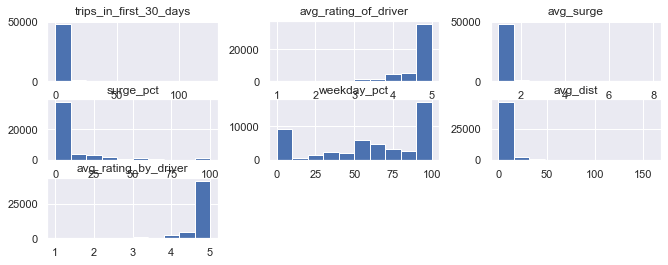

In [49]:
RiderDF.hist()

In [50]:
RiderDF.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


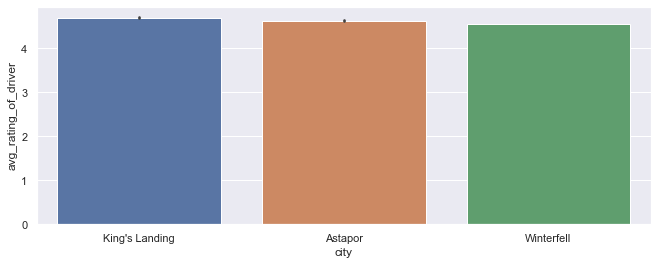

In [51]:
sns.barplot(data=RiderDF, x='city', y='avg_rating_of_driver')
plt.show()

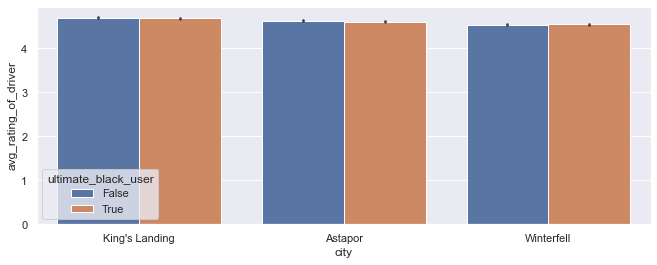

In [52]:
sns.barplot(data=RiderDF, x='city',  y='avg_rating_of_driver', hue='ultimate_black_user')
plt.show()

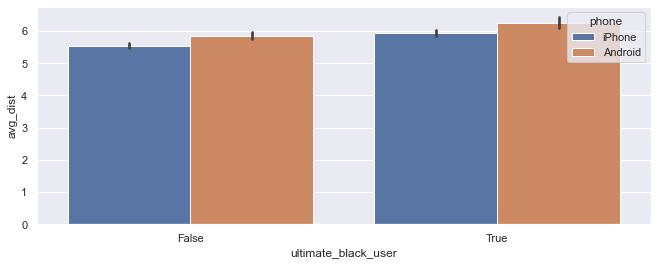

In [53]:
sns.barplot(data=RiderDF, x='ultimate_black_user', y='avg_dist', hue='phone')
plt.show()

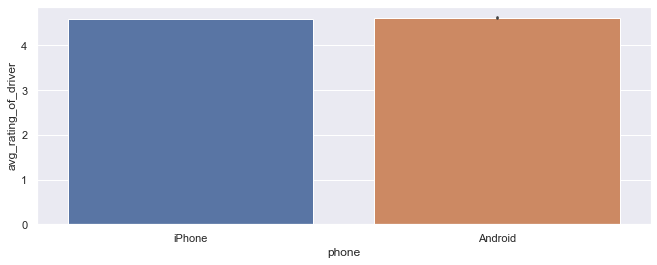

In [54]:
sns.barplot(data=RiderDF, x='phone', y='avg_rating_of_driver')
plt.show()

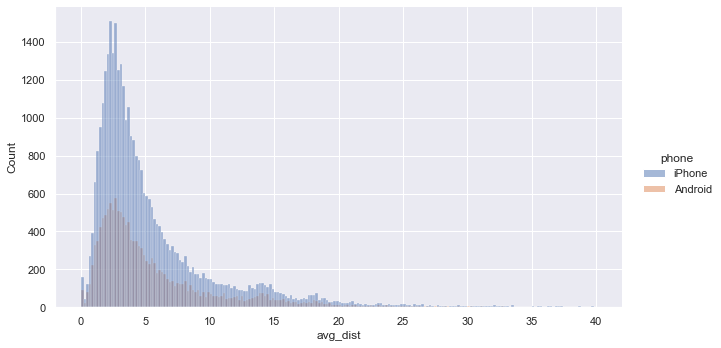

In [55]:
sns.displot(data=RiderDF, x='avg_dist', kind='hist', bins=200, binrange=(0,40), aspect=1.8, hue='phone')


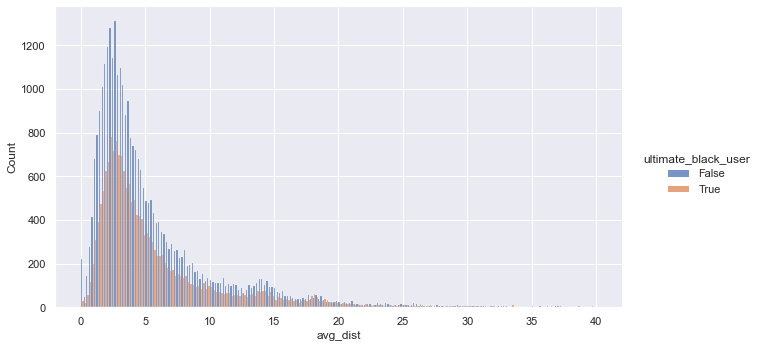

In [56]:
sns.displot(data=RiderDF, x='avg_dist', kind='hist', bins=200, binrange=(0,40), aspect=1.8, hue='ultimate_black_user', multiple='dodge')

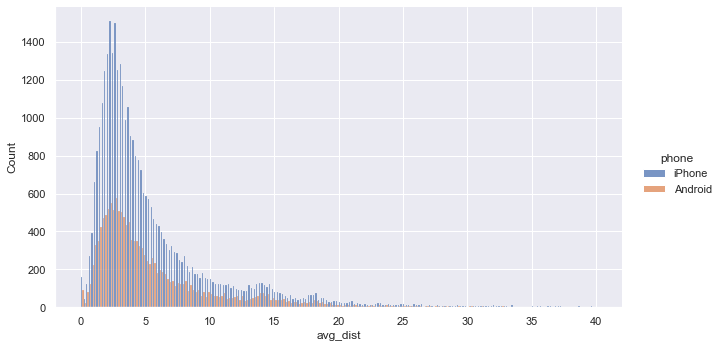

In [57]:
sns.displot(data=RiderDF, x='avg_dist', kind='hist', bins=200, binrange=(0,40), aspect=1.8, hue='phone', multiple='dodge')

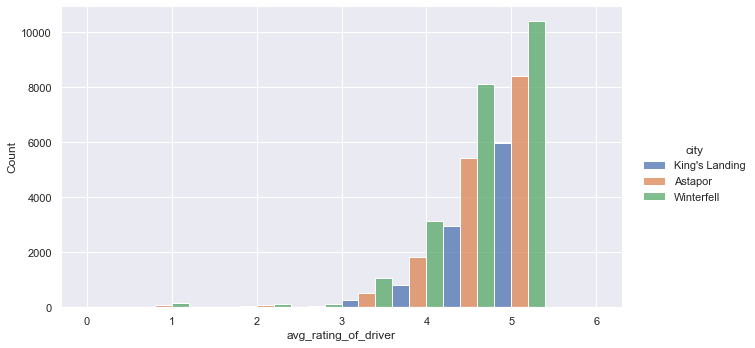

In [58]:
sns.displot(data=RiderDF, x='avg_rating_of_driver', kind='hist', bins=10, binrange=(0,6), aspect=1.8, hue='city', multiple='dodge')

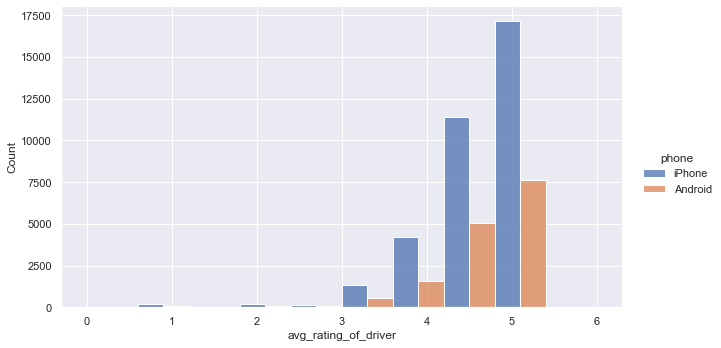

In [59]:
sns.displot(data=RiderDF, x='avg_rating_of_driver', kind='hist', bins=10, binrange=(0,6), aspect=1.8, hue='phone', multiple='dodge')

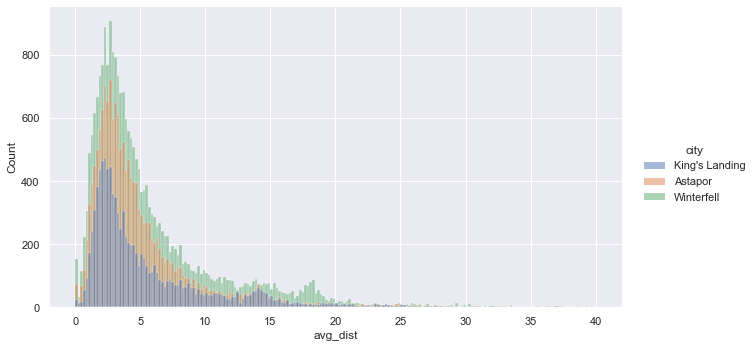

In [60]:
sns.displot(data=RiderDF, x='avg_dist', kind='hist', bins=200, binrange=(0,40), aspect=1.8, hue='city')

In [61]:
RiderDF['ultimate_black_user'] = RiderDF['ultimate_black_user'].astype(int)
RiderDF.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9


In [62]:
#Create retention labels for those who were "active", ie, took a trip in last few days
def get_last_trip_date(last_trip_date):
    if last_trip_date <'2014-06-01':
        return 0
    else:
        return 1

RiderDF['retained_label'] = RiderDF['last_trip_date'].map(get_last_trip_date)
RiderDF.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_label
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


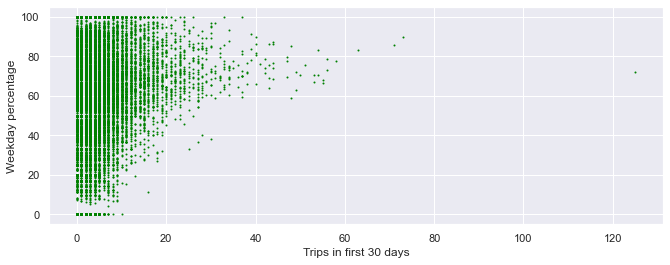

In [63]:
plt.scatter(RiderDF['trips_in_first_30_days'], RiderDF['weekday_pct'],
            marker ="o",
            edgecolor ="green",
            s = 1)
 
plt.xlabel("Trips in first 30 days")
plt.ylabel("Weekday percentage")
plt.show()

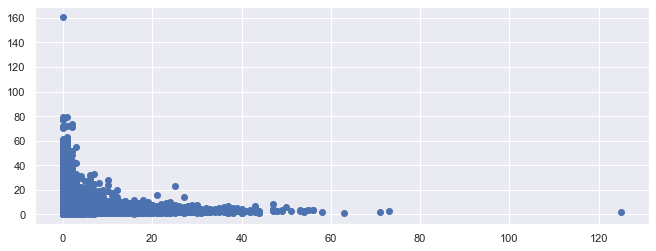

In [64]:
plt.scatter(RiderDF['trips_in_first_30_days'], RiderDF['avg_dist'], marker='o')

<AxesSubplot:xlabel='avg_dist', ylabel='phone'>

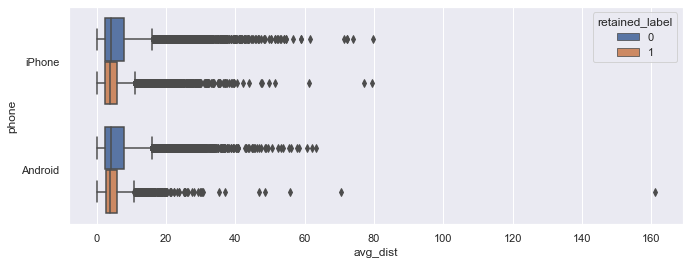

In [65]:
sns.boxplot(data=RiderDF, x="avg_dist", y="phone", hue='retained_label')

<AxesSubplot:xlabel='trips_in_first_30_days', ylabel='phone'>

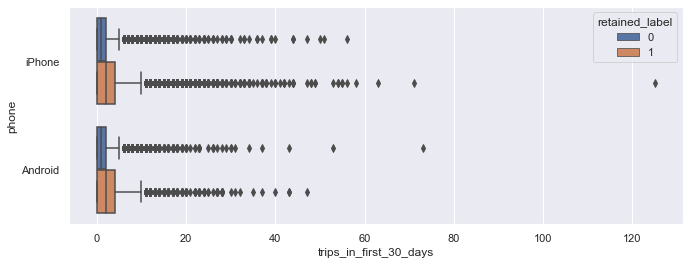

In [66]:
sns.boxplot(data=RiderDF, x="trips_in_first_30_days", y="phone", hue='retained_label')

In [67]:
#convert date columns to datetime
RiderDF['signup_date'] = pd.to_datetime(RiderDF['signup_date'])
RiderDF['last_trip_date'] = pd.to_datetime(RiderDF['last_trip_date'])
RiderDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  int32         
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  retained_label          49604 non-null  int64 

In [68]:
#Create length of signup from start to last trip, col/feature
RiderDF['Length_signup'] = RiderDF['last_trip_date'] - RiderDF['signup_date']
RiderDF.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_label,Length_signup
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1,143 days
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0,96 days
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0,1 days
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1,170 days
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,47 days


In [69]:
RiderDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   city                    49604 non-null  object         
 1   trips_in_first_30_days  49604 non-null  int64          
 2   signup_date             49604 non-null  datetime64[ns] 
 3   avg_rating_of_driver    49604 non-null  float64        
 4   avg_surge               49604 non-null  float64        
 5   last_trip_date          49604 non-null  datetime64[ns] 
 6   phone                   49604 non-null  object         
 7   surge_pct               49604 non-null  float64        
 8   ultimate_black_user     49604 non-null  int32          
 9   weekday_pct             49604 non-null  float64        
 10  avg_dist                49604 non-null  float64        
 11  avg_rating_by_driver    49604 non-null  float64        
 12  retained_label          49604 no

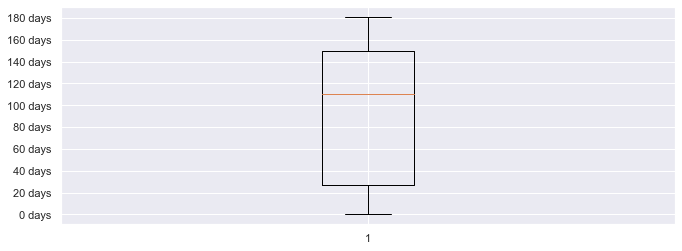

In [70]:
#use timple to deal with timedelta data
import timple

tmpl = timple.Timple()
tmpl.enable()

fig, ax = plt.subplots()
ax.boxplot(RiderDF['Length_signup'])
plt.show()


### Comments and observations
-  Approximately 37% of observed users were retained.
-  I addressed null values - see above - either using means to replace missing values (largely to do with driver ratings) or dropping a small number of rows with missing data.
-  Created and looked at various distribution plots/histograms, barcharts, boxplots and scatter plots
-  Checked datatatypes and changed date columns to datetimestamp.
-  Created a 'retained_label' column to indicate those users who are classed as retained.
-  Created a 'Length_signup' column to track length of time between sign up and last journey, as indicator of user loyalty.

#### Data observations
-  Those who took trips in first 30 days more likely to be retained, irrespective of type of phone
-  Trips in first 30 days more likely to be weekday trips
-  Trips in first 30 days tend to be shorter ones
-  Size of market in terms of journey distance and number of journeys is in following order with highest/largest market first: Winterfell, Astapor, King's Landing
-  Ultimate black users tended to have slightly longer average journeys
-  Type of phone doesn't affect ratings significantly, although there are significantly more iPhone users than Android users

### Build a predictive model

In [71]:
#Import relevant libraries and modules in addition to those for previous exercises
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [72]:
#Address categorical columns (city and phone) with one hot encoding
#check values in columns first
RiderDF['city'].nunique()


3

In [73]:
RiderDF['phone'].nunique()

2

In [74]:
#Mapping city values
mappingcity = {
    "King's Landing": 1,
    "Astapor": 2,
    "Winterfell": 3,
}

RiderDF['city'] =  RiderDF['city'].map(mappingcity)
RiderDF.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_label,Length_signup
0,1,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1,143 days
1,2,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0,96 days
2,2,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0,1 days
3,1,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1,170 days
4,3,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,47 days


In [75]:
#Mapping phone values
mappingcity = {
    "iPhone": 1,
    "Android": 2
}

RiderDF['phone'] =  RiderDF['phone'].map(mappingcity)
RiderDF.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_label,Length_signup
0,1,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0,1,143 days
1,2,0,2014-01-29,5.0,1.00,2014-05-05,2,0.0,0,50.0,8.26,5.0,0,96 days
2,2,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0,0,1 days
3,1,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9,1,170 days
4,3,14,2014-01-27,4.4,1.19,2014-03-15,2,11.8,0,82.4,3.13,4.9,0,47 days


In [76]:
#Convert datetime and timedelta columns to figures
RiderDF['signup_date'] = RiderDF['signup_date'].map(dt.datetime.toordinal)
RiderDF['last_trip_date'] = RiderDF['last_trip_date'].map(dt.datetime.toordinal)
RiderDF['Length_signup'] = RiderDF['Length_signup'].dt.days
RiderDF.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_label,Length_signup
0,1,4,735258,4.7,1.10,735401,1,15.4,1,46.2,3.67,5.0,1,143
1,2,0,735262,5.0,1.00,735358,2,0.0,0,50.0,8.26,5.0,0,96
2,2,3,735239,4.3,1.00,735240,1,0.0,0,100.0,0.77,5.0,0,1
3,1,9,735243,4.6,1.14,735413,1,20.0,1,80.0,2.36,4.9,1,170
4,3,14,735260,4.4,1.19,735307,2,11.8,0,82.4,3.13,4.9,0,47


In [77]:
RiderDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  int64  
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  int64  
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  int64  
 6   phone                   49604 non-null  int64  
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  int32  
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
 12  retained_label          49604 non-null  int64  
 13  Length_signup           49604 non-null  int64  
dtypes: float64(6), int32(1), int64(7)
memo

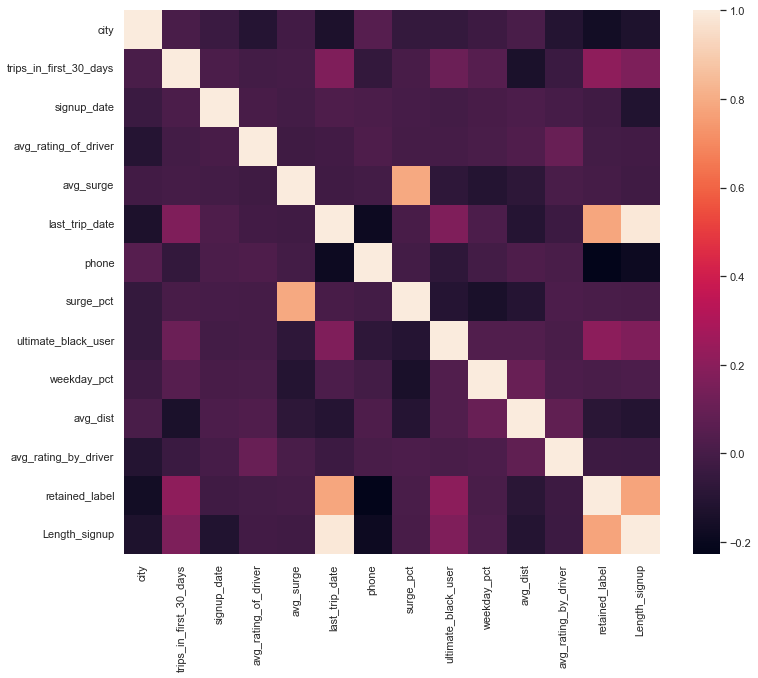

In [78]:
#Plot a correlation heatmap
plt.subplots(figsize=(12,10))
sns.heatmap(RiderDF.corr());

In [79]:
#Drop 'last_trip_date' column, as is in effect an indicator of the retained label
RiderDF =RiderDF.drop('last_trip_date', axis=1)
RiderDF.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_label,Length_signup
0,1,4,735258,4.7,1.10,1,15.4,1,46.2,3.67,5.0,1,143
1,2,0,735262,5.0,1.00,2,0.0,0,50.0,8.26,5.0,0,96
2,2,3,735239,4.3,1.00,1,0.0,0,100.0,0.77,5.0,0,1
3,1,9,735243,4.6,1.14,1,20.0,1,80.0,2.36,4.9,1,170
4,3,14,735260,4.4,1.19,2,11.8,0,82.4,3.13,4.9,0,47


#### Comment
There don't appear to be any strong correlations that you might not already expect. For instance, the last trip date is already going to be strongly related to whether someone is labelled as a retained user, and you might expect the length of time to have some inverse correlation with retention.
The two slight positive correlations relate to trips in the first 30 days and being an ultimate black user - these might be worth of more attention re those users at risk of churning.

In [80]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "retained_label"
features = [ele for ele in RiderDF.columns if ele != 'retained_label']

# Make an explanatory variable called X
X = RiderDF[features]

# Make a dependent variable called y
y = RiderDF.retained_label

In [81]:
X.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct',
       'avg_dist', 'avg_rating_by_driver', 'Length_signup'],
      dtype='object')

In [82]:
#Standardise the data
#instantiate
scaled = StandardScaler()
 
# standardization 
X = scaled.fit_transform(X) 
print(X[0])

[-1.63112519  0.454159    0.96598535  0.17429966  0.1123185  -0.65908105
  0.3264168   1.29041166 -0.39594147 -0.37311256  0.49782589  0.80673951]


This is a binary classification problem, so I wanted to try a few different classifiers, namely:

-  Logistic Regression Classifier
-  Random Forest Decision Tree Classifier
-  Linear Subject Vector Classifier

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 47)

In [84]:
#Try Logistic regression model
LogRmodel = LogisticRegression()

#Fitting training set to the model
LogRmodel.fit(X_train, y_train)

#Predicting the test set results based on the model
y_pred = LogRmodel.predict(X_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test, y_pred)
 
print("Accuracy: ",round(score*100,2),"%")

Accuracy:  99.43 %


In [85]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6179,   42],
       [  15, 3685]], dtype=int64)

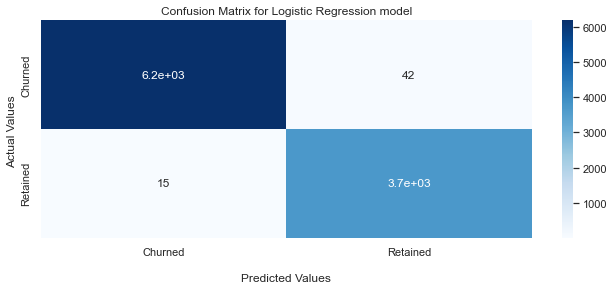

In [86]:
#Visualize confusion matrix using seaborn
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression model');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Tick labels 
ax.xaxis.set_ticklabels(['Churned','Retained'])
ax.yaxis.set_ticklabels(['Churned','Retained'])

## Display the visualization 
plt.show()

In [87]:
#Print a classification report
print("                       Classification_report")
print()
print(classification_report(y_pred , y_test))

                       Classification_report

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6194
           1       1.00      0.99      0.99      3727

    accuracy                           0.99      9921
   macro avg       0.99      0.99      0.99      9921
weighted avg       0.99      0.99      0.99      9921



In [88]:
#Instantiate
RFCmodel = RandomForestClassifier(random_state=0)

#Fitting training set to the model
RFCmodel.fit(X_train, y_train)

#Predicting the test set results based on the model
y_pred = RFCmodel.predict(X_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test, y_pred)
 
print("Accuracy: ",round(score*100,2),"%")

Accuracy:  99.34 %


In [89]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6186,   35],
       [  30, 3670]], dtype=int64)

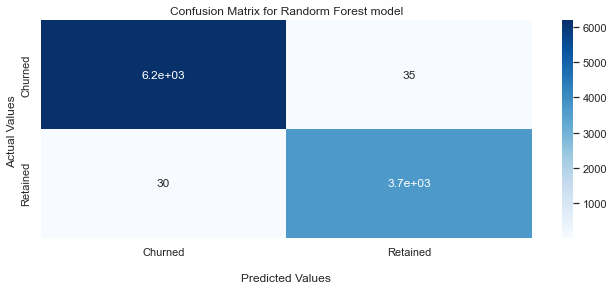

In [90]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Randorm Forest model');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Tick labels 
ax.xaxis.set_ticklabels(['Churned','Retained'])
ax.yaxis.set_ticklabels(['Churned','Retained'])

## Display the visualization 
plt.show()

In [91]:
#Print a classification report
print("                       Classification_report")
print()
print(classification_report(y_pred , y_test))

                       Classification_report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6216
           1       0.99      0.99      0.99      3705

    accuracy                           0.99      9921
   macro avg       0.99      0.99      0.99      9921
weighted avg       0.99      0.99      0.99      9921



In [92]:
#Linear Subject Vector model
LinSVMmodel = LinearSVC(random_state=0)

#Fitting training set to the model
LinSVMmodel.fit(X_train, y_train)

#Predicting the test set results based on the model
y_pred = LinSVMmodel.predict(X_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test, y_pred)
 
print("Accuracy: ",round(score*100,2),"%")

Accuracy:  99.58 %


C:\Users\Pearc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [93]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6188,   33],
       [   9, 3691]], dtype=int64)

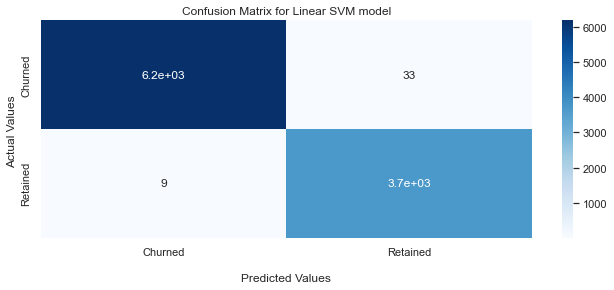

In [94]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Linear SVM model');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Tick labels 
ax.xaxis.set_ticklabels(['Churned','Retained'])
ax.yaxis.set_ticklabels(['Churned','Retained'])

## Display the visualization 
plt.show()

In [95]:
#Print a classification report
print("                       Classification_report")
print()
print(classification_report(y_pred , y_test))

                       Classification_report

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6197
           1       1.00      0.99      0.99      3724

    accuracy                           1.00      9921
   macro avg       1.00      0.99      1.00      9921
weighted avg       1.00      1.00      1.00      9921



### Conclusions
All three models worked well, but the Linear Subject Vector Machines Classifier had fewer false negatives and positives, with the following Classification report


 Classification_report

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6197
           1       1.00      0.99      0.99      3724

    accuracy                           1.00      9921
   macro avg       1.00      0.99      1.00      9921
weighted avg       1.00      1.00      1.00      9921

In terms of insight for Ultimate, the following might apply:

-  concentrating on customers at one month after their initial sign-up, to encourage them to use the service again, eg, through incentives, and/or to understand why they might not want to use the service again, as there is clearly a high drop off point after the short-term.
-  reviewing and changing the feedback rating system. In terms of predicting user retention it appears to have little value and despite the vast majority of ratings being a the high end of teh scale (4 or 5), it's clearly not a good indicator of long-term use.
- invest in getting more people to be "ultimate black users" as there is some evidence this supports improved retention.